In [141]:
from itertools import combinations
import numpy as np 
'''
55
5 111 3 22 5 
22 13 31 13 22
#####
#.#.#
.###.
##.##
#####
'''

'\n55\n5 111 3 22 5 \n22 13 31 13 22\n#####\n#.#.#\n.###.\n##.##\n#####\n'

In [142]:
# ROWS_VALUES = [[5],[1,1,1],[3],[2,2],[5]]
# COLS_VALUES = [[2,2],[1,3],[3,1],[1,3],[2,2]]

In [150]:
num_row_col = []
row_col_val = []

with open("./zad_input.txt", "r") as file:
    for i, line in enumerate(file):
        if i == 0:
            line = line.strip()
            num_row_col = [int(x) for x in line.split(" ")]
        else:
            line = line.strip()
            data = [int(x) for x in line.split(" ")]
            row_col_val.append(data)

ROWS_VALUES = row_col_val[:int(num_row_col[0])]
COLS_VALUES = row_col_val[int(num_row_col[1]):]
print(ROWS_VALUES)
print(COLS_VALUES)

[[5], [9], [5, 5], [13], [3, 5, 3], [15], [1, 5, 5, 1], [15], [2, 2], [2, 2], [1, 1], [1, 1], [1, 1], [2, 2], [5]]
[[3], [3, 1], [6], [7], [3, 3, 5], [10, 2], [9, 1], [2, 3, 1, 1], [9, 1], [10, 2], [3, 3, 5], [7], [6], [3, 1], [3]]


In [144]:
ROWS_VALUES = ROWS_VALUES
no_of_rows = len(ROWS_VALUES)
rows_changed = [0] * no_of_rows
rows_done = [0] * no_of_rows

COLS_VALUES = COLS_VALUES
no_of_cols = len(COLS_VALUES)
cols_changed = [0] * no_of_cols
cols_done = [0] * no_of_cols

solved = False 
shape = (no_of_rows, no_of_cols)
board = [[0 for c in range(no_of_cols)] for r in range(no_of_rows)]

In [145]:
def _create_possibilities(n_empty, groups, ones):
    res_opts = []
    for p in combinations(range(groups+n_empty), groups):
        selected = [-1]*(groups+n_empty)
        ones_idx = 0
        for val in p:
            selected[val] = ones_idx
            ones_idx += 1
        res_opt = [ones[val]+[-1] if val > -1 else [-1] for val in selected]
        res_opt = [item for sublist in res_opt for item in sublist][:-1]
        res_opts.append(res_opt)
    return res_opts
    
def create_possibilities(values, no_of_other):
    possibilities = []
    for v in values:
        groups = len(v)
        no_empty = no_of_other-sum(v)-groups+1
        ones = [[1]*x for x in v]
        res = _create_possibilities(no_empty, groups, ones)
        possibilities.append(res)  
    
    return possibilities

In [146]:
# step 1: Defining all possible solutions for every row and col
rows_possibilities = create_possibilities(ROWS_VALUES, no_of_cols)
cols_possibilities = create_possibilities(COLS_VALUES, no_of_rows)

In [147]:
def select_index_not_done(possibilities, row_ind):
        s = [len(i) for i in possibilities]
        if row_ind:
            return [(i, n, row_ind) for i, n in enumerate(s) if rows_done[i] == 0]
        else:
            return [(i, n, row_ind) for i, n in enumerate(s) if cols_done[i] == 0]

def get_only_one_option(values):
    return [(n, np.unique(i)[0]) for n, i in enumerate(np.array(values).T) if len(np.unique(i)) == 1]

def remove_possibilities(possibilities, i, val):
    return [p for p in possibilities if p[i] == val]

def check_done(row_ind, idx):
    if row_ind: return rows_done[idx]
    else: return cols_done[idx]
    
def update_done(row_ind, idx):
    if row_ind: vals = board[idx]
    else: vals = [row[idx] for row in board]
    if 0 not in vals:
        if row_ind: rows_done[idx] = 1
        else: cols_done[idx] = 1 

In [149]:
while not solved:
    # step 2: Order indici by lowest 
    lowest_rows = select_index_not_done(rows_possibilities, 1)
    lowest_cols = select_index_not_done(cols_possibilities, 0)
    lowest = sorted(lowest_rows + lowest_cols, key=lambda element: element[1])

    # step 3: Get only zeroes or only ones of lowest possibility 
    for ind1, _, row_ind in lowest:
        if not check_done(row_ind, ind1):
            if row_ind: values = rows_possibilities[ind1]
            else: values = cols_possibilities[ind1]
            same_ind = get_only_one_option(values)
            for ind2, val in same_ind:
                if row_ind: ri, ci = ind1, ind2
                else: ri, ci = ind2, ind1 
                if board[ri][ci] == 0:
                    board[ri][ci] = val
                    if row_ind: cols_possibilities[ci] = remove_possibilities(cols_possibilities[ci], ri, val)
                    else: rows_possibilities[ri] = remove_possibilities(rows_possibilities[ri], ci, val)
                    # clear_output(wait=True)
            update_done(row_ind, ind1)
    if 0 not in rows_done and 0 not in cols_done:
        print(board)
        break
    else:
        print('no solution')   
        break     

no solution


In [ ]:
for i in range(len(board)):
    for j in range(len(board[i])):
        if board[i][j] == 1:
            board[i][j] = '#'
        if board[i][j] == -1:
            board[i][j] = '.'
with open("./zad output.txt", "w") as f:
    for row in board:
        line = "".join(str(x) for x in row) + "\n"
        f.write(line)

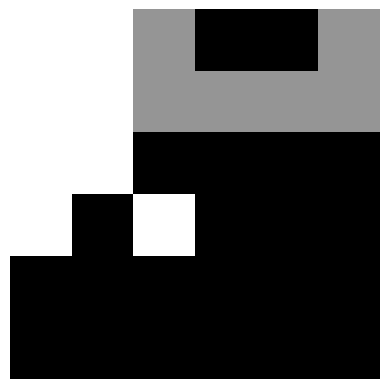

KeyboardInterrupt: 

In [155]:
import os, time
from itertools import combinations
import numpy as np 
import matplotlib.pyplot as plt 
from IPython.display import clear_output

class NonogramSolver:
    def __init__(self, ROWS_VALUES=[[3], [1, 1], [4], [1, 3], [6], [6]], COLS_VALUES=[[2], [3], [3], [3], [2], [1]], savepath=''):
        self.ROWS_VALUES = ROWS_VALUES
        self.no_of_rows = len(ROWS_VALUES)
        self.rows_changed = [0] * self.no_of_rows
        self.rows_done = [0] * self.no_of_rows

        self.COLS_VALUES = COLS_VALUES
        self.no_of_cols = len(COLS_VALUES)
        self.cols_changed = [0] * self.no_of_cols
        self.cols_done = [0] * self.no_of_cols

        self.solved = False 
        self.shape = (self.no_of_rows, self.no_of_cols)
        self.board = [[0 for c in range(self.no_of_cols)] for r in range(self.no_of_rows)]
        self.savepath = savepath
        if self.savepath != '': self.n = 0

        # step 1: Defining all possible solutions for every row and col
        self.rows_possibilities = self.create_possibilities(ROWS_VALUES, self.no_of_cols)
        self.cols_possibilities = self.create_possibilities(COLS_VALUES, self.no_of_rows)
        
        while not self.solved:
            # step 2: Order indici by lowest 
            self.lowest_rows = self.select_index_not_done(self.rows_possibilities, 1)
            self.lowest_cols = self.select_index_not_done(self.cols_possibilities, 0)
            self.lowest = sorted(self.lowest_rows + self.lowest_cols, key=lambda element: element[1])

            # step 3: Get only zeroes or only ones of lowest possibility 
            for ind1, _, row_ind in self.lowest:
                if not self.check_done(row_ind, ind1):
                    if row_ind: values = self.rows_possibilities[ind1]
                    else: values = self.cols_possibilities[ind1]
                    same_ind = self.get_only_one_option(values)
                    for ind2, val in same_ind:
                        if row_ind: ri, ci = ind1, ind2
                        else: ri, ci = ind2, ind1 
                        if self.board[ri][ci] == 0:
                            self.board[ri][ci] = val
                            if row_ind: self.cols_possibilities[ci] = self.remove_possibilities(self.cols_possibilities[ci], ri, val)
                            else: self.rows_possibilities[ri] = self.remove_possibilities(self.rows_possibilities[ri], ci, val)
                            clear_output(wait=True)
                            self.display_board()
                            if self.savepath != '':
                                self.save_board()
                                self.n += 1
                    self.update_done(row_ind, ind1)
            self.check_solved()
                    
    def create_possibilities(self, values, no_of_other):
        possibilities = []
        
        for v in values:
            groups = len(v)
            no_empty = no_of_other-sum(v)-groups+1
            ones = [[1]*x for x in v]
            res = self._create_possibilities(no_empty, groups, ones)
            possibilities.append(res)  
        
        return possibilities

    def _create_possibilities(self, n_empty, groups, ones):
        res_opts = []
        for p in combinations(range(groups+n_empty), groups):
            selected = [-1]*(groups+n_empty)
            ones_idx = 0
            for val in p:
                selected[val] = ones_idx
                ones_idx += 1
            res_opt = [ones[val]+[-1] if val > -1 else [-1] for val in selected]
            res_opt = [item for sublist in res_opt for item in sublist][:-1]
            res_opts.append(res_opt)
        return res_opts

    def select_index_not_done(self, possibilities, row_ind):
        s = [len(i) for i in possibilities]
        if row_ind:
            return [(i, n, row_ind) for i, n in enumerate(s) if self.rows_done[i] == 0]
        else:
            return [(i, n, row_ind) for i, n in enumerate(s) if self.cols_done[i] == 0]

    def get_only_one_option(self, values):
        return [(n, np.unique(i)[0]) for n, i in enumerate(np.array(values).T) if len(np.unique(i)) == 1]

    def remove_possibilities(self, possibilities, i, val):
        return [p for p in possibilities if p[i] == val]

    def display_board(self):
        plt.imshow(self.board, cmap='Greys')
        plt.axis('off')
        plt.show()

    def save_board(self, increase_size=20):
        name = f'0000000{str(self.n)}'[-8:]
        increased_board = np.zeros(np.array((self.no_of_rows, self.no_of_cols)) * increase_size)
        for j in range(self.no_of_rows):
            for k in range(self.no_of_cols):
                increased_board[j * increase_size : (j+1) * increase_size, k * increase_size : (k+1) * increase_size] = self.board[j][k]
        plt.imsave(os.path.join(self.savepath, f'{name}.jpeg'), increased_board, cmap='Greys', dpi=1000)

    def update_done(self, row_ind, idx):
        if row_ind: vals = self.board[idx]
        else: vals = [row[idx] for row in self.board]
        if 0 not in vals:
            if row_ind: self.rows_done[idx] = 1
            else: self.cols_done[idx] = 1 

    def check_done(self, row_ind, idx):
        if row_ind: return self.rows_done[idx]
        else: return self.cols_done[idx]

    def check_solved(self):
        if 0 not in self.rows_done and 0 not in self.cols_done:
            self.solved = True
a =NonogramSolver()

In [ ]:

from itertools import combinations
import numpy as np 

def create_possibilities(values, no_of_other):
    possibilities = []

    for v in values:
        groups = len(v)
        no_empty = no_of_other-sum(v)-groups+1
        ones = [[1]*x for x in v]
        res = _create_possibilities(no_empty, groups, ones)
        possibilities.append(res)  
    
    return possibilities

def _create_possibilities(n_empty, groups, ones):
    res_opts = []
    for p in combinations(range(groups+n_empty), groups):
        selected = [-1]*(groups+n_empty)
        ones_idx = 0
        for val in p:
            selected[val] = ones_idx
            ones_idx += 1
        res_opt = [ones[val]+[-1] if val > -1 else [-1] for val in selected]
        res_opt = [item for sublist in res_opt for item in sublist][:-1]
        res_opts.append(res_opt)
    return res_opts

def select_index_not_done(possibilities, row_ind):
        s = [len(i) for i in possibilities]
        if row_ind:
            return [(i, n, row_ind) for i, n in enumerate(s) if rows_done[i] == 0]
        else:
            return [(i, n, row_ind) for i, n in enumerate(s) if cols_done[i] == 0]

def get_only_one_option(values):
    return [(n, np.unique(i)[0]) for n, i in enumerate(np.array(values).T) if len(np.unique(i)) == 1]

def remove_possibilities(possibilities, i, val):
    return [p for p in possibilities if p[i] == val]

def check_done(row_ind, idx):
    if row_ind: return rows_done[idx]
    else: return cols_done[idx]
    
def update_done(row_ind, idx):
    if row_ind: vals = board[idx]
    else: vals = [row[idx] for row in board]
    if 0 not in vals:
        if row_ind: rows_done[idx] = 1
        else: cols_done[idx] = 1 
        
def check_solved(rows_done,cols_done):
    if 0 not in rows_done and 0 not in cols_done:
        return 
    
if __name__ == '__main__':
    num_row_col = []
    row_col_val = []

    with open("./zad_input.txt", "r") as file:
        for i, line in enumerate(file):
            if i == 0:
                line = line.strip()
                num_row_col = [int(x) for x in line.split(" ")]
            else:
                line = line.strip()
                data = [int(x) for x in line.split(" ")]
                row_col_val.append(data)
    # print(num_row_col)
    # print(row_col_val)
    ROWS_VALUES = row_col_val[:num_row_col[0]]
    COLS_VALUES = row_col_val[num_row_col[0]:]
    # print(ROWS_VALUES)
    # print(COLS_VALUES)
    no_of_rows = num_row_col[0]
    rows_changed = [0] * no_of_rows
    rows_done = [0] * no_of_rows

    no_of_cols = num_row_col[1]
    cols_changed = [0] * no_of_cols
    cols_done = [0] * no_of_cols

    solved = False 
    shape = (no_of_rows, no_of_cols)
    board = [[0 for c in range(no_of_cols)] for r in range(no_of_rows)]
    COLS_VALUES = COLS_VALUES
    no_of_cols = len(COLS_VALUES)
    cols_changed = [0] * no_of_cols
    cols_done = [0] * no_of_cols

    solved = False 
    shape = (no_of_rows, no_of_cols)
    board = [[0 for c in range(no_of_cols)] for r in range(no_of_rows)]


    # step 1: Defining all possible solutions for every row and col
    rows_possibilities = create_possibilities(ROWS_VALUES, no_of_cols)
    cols_possibilities = create_possibilities(COLS_VALUES, no_of_rows)

    while not solved:
        # step 2: Order indici by lowest 
        lowest_rows = select_index_not_done(rows_possibilities, 1)
        lowest_cols = select_index_not_done(cols_possibilities, 0)
        lowest = sorted(lowest_rows + lowest_cols, key=lambda element: element[1])

        # step 3: Get only zeroes or only ones of lowest possibility 
        for ind1, _, row_ind in lowest:
            if not check_done(row_ind, ind1):
                if row_ind: values = rows_possibilities[ind1]
                else: values = cols_possibilities[ind1]
                same_ind = get_only_one_option(values)
                for ind2, val in same_ind:
                    if row_ind: ri, ci = ind1, ind2
                    else: ri, ci = ind2, ind1 
                    if board[ri][ci] == 0:
                        board[ri][ci] = val
                        if row_ind: cols_possibilities[ci] = remove_possibilities(cols_possibilities[ci], ri, val)
                        else: rows_possibilities[ri] = remove_possibilities(rows_possibilities[ri], ci, val)
                update_done(row_ind, ind1)
        if 0 not in rows_done and 0 not in cols_done:
            # print(board)   
            solved = True     
            break
    for i in range(len(board)):
        for j in range(len(board[i])):
            if board[i][j] == 1:
                board[i][j] = '#'
            if board[i][j] == -1:
                board[i][j] = '.'
    with open("./zad_output.txt", "w") as f:
        for row in board:
            line = "".join(str(x) for x in row) + "\n"
            # print(line)
            f.write(line)
